In [1]:
import time
import re
import json 

import requests
from bs4 import BeautifulSoup

from datetime import datetime
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import concurrent.futures
from functools import reduce

In [2]:
main_url = 'https://covid19.go.id/peta-sebaran'

In [3]:
# regex pattern for getting the Province Name
pattern = r'([A-Z]+_*){3,5}\.'

In [4]:
#url = 'https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_SUMATERA_UTARA.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_MALUKU.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_KEPULAUAN_BANGKA_BELITUNG.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_LAMPUNG.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_BANTEN.json'
#url = 'https://data.covid19.go.id/public/api/prov_detail_BALI.json'
url = 'https://data.covid19.go.id/public/api/prov_detail_DAERAH_ISTIMEWA_YOGYAKARTA.json'

# source = requests.get(url)
# data_dict = json.loads(source.text)

In [5]:
re.search(pattern, url).group().replace('_', ' ').replace('.', '')

'DAERAH ISTIMEWA YOGYAKARTA'

In [6]:
# json files for COVID stats in each province to be scraped later
url_list = ['https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json',
            'https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json',
            'https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json',
            'https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json',
            'https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json',
            'https://data.covid19.go.id/public/api/prov_detail_BANTEN.json',
            'https://data.covid19.go.id/public/api/prov_detail_NUSA_TENGGARA_BARAT.json',
            'https://data.covid19.go.id/public/api/prov_detail_BALI.json',
            'https://data.covid19.go.id/public/api/prov_detail_PAPUA.json',
            'https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_SELATAN.json',
            'https://data.covid19.go.id/public/api/prov_detail_SUMATERA_BARAT.json',
            'https://data.covid19.go.id/public/api/prov_detail_SUMATERA_SELATAN.json',
            'https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_TENGAH.json',
            'https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_TIMUR.json',
            'https://data.covid19.go.id/public/api/prov_detail_SUMATERA_UTARA.json',
            'https://data.covid19.go.id/public/api/prov_detail_DAERAH_ISTIMEWA_YOGYAKARTA.json',
            'https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_UTARA.json',
            'https://data.covid19.go.id/public/api/prov_detail_KEPULAUAN_RIAU.json',
            'https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_BARAT.json',
            'https://data.covid19.go.id/public/api/prov_detail_SULAWESI_TENGGARA.json',
            'https://data.covid19.go.id/public/api/prov_detail_LAMPUNG.json',
            'https://data.covid19.go.id/public/api/prov_detail_SULAWESI_UTARA.json',
            'https://data.covid19.go.id/public/api/prov_detail_SULAWESI_TENGAH.json',
            'https://data.covid19.go.id/public/api/prov_detail_RIAU.json',
            'https://data.covid19.go.id/public/api/prov_detail_PAPUA_BARAT.json',
            'https://data.covid19.go.id/public/api/prov_detail_SULAWESI_BARAT.json',
            'https://data.covid19.go.id/public/api/prov_detail_JAMBI.json',
            'https://data.covid19.go.id/public/api/prov_detail_MALUKU_UTARA.json',
            'https://data.covid19.go.id/public/api/prov_detail_MALUKU.json',
            'https://data.covid19.go.id/public/api/prov_detail_GORONTALO.json',
            'https://data.covid19.go.id/public/api/prov_detail_KEPULAUAN_BANGKA_BELITUNG.json',
            'https://data.covid19.go.id/public/api/prov_detail_ACEH.json',
            'https://data.covid19.go.id/public/api/prov_detail_BENGKULU.json',
            'https://data.covid19.go.id/public/api/prov_detail_NUSA_TENGGARA_TIMUR.json',]
len(url_list)

34

In [7]:
def data_cleaning(url):
    """
    Function to clean the dataframe for each province
    """
    pattern = r'([A-Z]+_*){3,5}\.'
    province = re.search(pattern, url).group().replace('_', ' ').replace('.', '')
    
    source = requests.get(url)
    data_dict = json.loads(source.text)
    
    df = pd.DataFrame(data = data_dict['list_perkembangan'])
    df['tanggal'] = df['tanggal'].apply(lambda x: datetime.fromtimestamp(x / 1000).strftime('%Y-%m-%d'))
    df['Province'] = province
    
    return df

In [8]:
data_cleaning(url)

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI,Province
0,2020-03-15,1,0,0,1,1,0,0,1,DAERAH ISTIMEWA YOGYAKARTA
1,2020-03-16,0,0,0,0,1,0,0,1,DAERAH ISTIMEWA YOGYAKARTA
2,2020-03-17,0,0,0,0,1,0,0,1,DAERAH ISTIMEWA YOGYAKARTA
3,2020-03-18,0,0,0,0,1,0,0,1,DAERAH ISTIMEWA YOGYAKARTA
4,2020-03-19,0,0,1,-1,1,1,0,0,DAERAH ISTIMEWA YOGYAKARTA
...,...,...,...,...,...,...,...,...,...,...
148,2020-08-10,4,0,16,-12,865,609,25,231,DAERAH ISTIMEWA YOGYAKARTA
149,2020-08-11,20,1,24,-5,885,633,26,226,DAERAH ISTIMEWA YOGYAKARTA
150,2020-08-12,11,0,13,-2,896,646,26,224,DAERAH ISTIMEWA YOGYAKARTA
151,2020-08-13,35,2,12,21,931,658,28,245,DAERAH ISTIMEWA YOGYAKARTA


In [9]:
time1 = time.perf_counter()

# Implementing Multithreading to speed up the scraping process
if __name__ == '__main__':
    with concurrent.futures.ThreadPoolExecutor(max_workers = 5) as executor:
        frame_iterable = executor.map(data_cleaning, url_list)
    print(f'Total time taken: {time.perf_counter() - time1} seconds')
    
    combined_df = pd.concat(list(frame_iterable), ignore_index = True)

combined_df.rename(columns = {'tanggal': 'Date',
                              'KASUS': 'No. of new cases',
                              'MENINGGAL': 'No. of new deaths',
                              'SEMBUH': 'No. of new people cured',
                              'DIRAWAT_OR_ISOLASI': 'Change in No. of new people being treated/isolated',
                              'AKUMULASI_KASUS': 'Cumulative No. of cases',
                              'AKUMULASI_SEMBUH': 'Cumulative No. of people cured',
                              'AKUMULASI_MENINGGAL': 'Cumulative No. of deaths',
                              'AKUMULASI_DIRAWAT_OR_ISOLASI': 'Cumulative No. of people being treated/isolated'},
                  inplace = True)    

combined_df

Total time taken: 17.994734 seconds


,Date,No. of new cases,No. of new deaths,No. of new people cured,Change in No. of new people being treated/isolated,Cumulative No. of cases,Cumulative No. of people cured,Cumulative No. of deaths,Cumulative No. of people being treated/isolated,Province
0,2020-02-29,2,0,0,2,2,0,0,2,DKI JAKARTA
1,2020-03-01,2,0,0,2,4,0,0,4,DKI JAKARTA
2,2020-03-02,2,0,0,2,6,0,0,6,DKI JAKARTA
3,2020-03-03,2,0,0,2,8,0,0,8,DKI JAKARTA
4,2020-03-04,0,1,0,-1,8,0,1,7,DKI JAKARTA
...,...,...,...,...,...,...,...,...,...,...
4928,2020-08-10,3,0,1,2,155,131,1,23,NUSA TENGGARA TIMUR
4929,2020-08-11,7,0,6,1,162,137,1,24,NUSA TENGGARA TIMUR
4930,2020-08-12,0,0,0,0,162,137,1,24,NUSA TENGGARA TIMUR
4931,2020-08-13,0,0,0,0,162,137,1,24,NUSA TENGGARA TIMUR


In [10]:
combined_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Date                                                4933 non-null   object
 1   No. of new cases                                    4933 non-null   int64 
 2   No. of new deaths                                   4933 non-null   int64 
 3   No. of new people cured                             4933 non-null   int64 
 4   Change in No. of new people being treated/isolated  4933 non-null   int64 
 5   Cumulative No. of cases                             4933 non-null   int64 
 6   Cumulative No. of people cured                      4933 non-null   int64 
 7   Cumulative No. of deaths                            4933 non-null   int64 
 8   Cumulative No. of people being treated/isolated     4933 non-null   int64 
 9   Province

In [19]:
# Saving the file
combined_df.to_csv('Latest COVID-19 stats per Province.csv')

In [11]:
# Dividing the data to descriptive and cumulative stats
descriptive_stats = combined_df[['Province',
                                 'Date', 
                                 'No. of new cases', 
                                 'No. of new deaths', 
                                 'No. of new people cured', 
                                 'Change in No. of new people being treated/isolated']]

cumulative_stats = combined_df[['Province',
                                'Date',
                                'Cumulative No. of cases',
                                'Cumulative No. of deaths',
                                'Cumulative No. of people cured',
                                'Cumulative No. of people being treated/isolated']]

In [12]:
descriptive_stats

,Province,Date,No. of new cases,No. of new deaths,No. of new people cured,Change in No. of new people being treated/isolated
0,DKI JAKARTA,2020-02-29,2,0,0,2
1,DKI JAKARTA,2020-03-01,2,0,0,2
2,DKI JAKARTA,2020-03-02,2,0,0,2
3,DKI JAKARTA,2020-03-03,2,0,0,2
4,DKI JAKARTA,2020-03-04,0,1,0,-1
...,...,...,...,...,...,...
4928,NUSA TENGGARA TIMUR,2020-08-10,3,0,1,2
4929,NUSA TENGGARA TIMUR,2020-08-11,7,0,6,1
4930,NUSA TENGGARA TIMUR,2020-08-12,0,0,0,0
4931,NUSA TENGGARA TIMUR,2020-08-13,0,0,0,0


In [15]:
def get_individual_stats(df, attribute):
    """
    Returns a dictionary in json format that contains the statistics of each province over time for that attribute
    using the attribute as the key
    
    For example: If the attribute you are interested in is: No. of new deaths in each province, which is an attribute 
    of the descriptive_stats dataframe, you can access the dataframe through 
    pd.read_json(get_individual_stats(descriptive_stats, 'No. of new deaths'))['No. of new deaths']
    """
    
    province_group = df[[attribute, 'Province', 'Date']].set_index('Date').groupby('Province')
    
    province_df_list = []
    for key, table in province_group:
        table.rename(columns = {attribute: key}, inplace = True)
        table.drop(columns = ['Province'], inplace = True)
        table.reset_index(inplace = True)
        province_df_list.append(table)
    
    # Merging all the data from different provinces into 1 dataframe
    attribute_df = reduce(lambda df1, df2: pd.merge(df1, df2,
                                                    on = 'Date',
                                                    how = 'outer'), province_df_list)
    
    attribute_df.fillna(0, inplace = True)
    attribute_df.set_index('Date', inplace = True)
    attribute_df = attribute_df.astype('int32')
    attribute_df.sort_index(inplace = True)
    
    # Converting the data to json format
    attribute_df_json = attribute_df.to_json(orient = 'columns')
    
    return attribute_df_json

In [16]:
# Creating a Master dictionary for all attributes 
every_attribute_stats = {}
list_of_attributes = ['No. of new cases',
                      'No. of new deaths', 
                      'No. of new people cured', 
                      'Change in No. of new people being treated/isolated',
                      'Cumulative No. of cases',
                      'Cumulative No. of deaths',
                      'Cumulative No. of people cured',
                      'Cumulative No. of people being treated/isolated']

every_attribute_stats['No. of new cases'] = get_individual_stats(descriptive_stats, 'No. of new cases')
every_attribute_stats['No. of new deaths'] = get_individual_stats(descriptive_stats, 'No. of new deaths')
every_attribute_stats['No. of new people cured'] = get_individual_stats(descriptive_stats, 'No. of new people cured')
every_attribute_stats['Change in No. of new people being treated/isolated'] = get_individual_stats(descriptive_stats, 'Change in No. of new people being treated/isolated')
every_attribute_stats['Cumulative No. of cases'] = get_individual_stats(cumulative_stats, 'Cumulative No. of cases')
every_attribute_stats['Cumulative No. of deaths'] = get_individual_stats(cumulative_stats, 'Cumulative No. of deaths')
every_attribute_stats['Cumulative No. of people cured'] = get_individual_stats(cumulative_stats, 'Cumulative No. of people cured')
every_attribute_stats['Cumulative No. of people being treated/isolated'] = get_individual_stats(cumulative_stats, 'Cumulative No. of people being treated/isolated')

C:\Users\jorda\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\jorda\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
every_attribute_stats.keys()

dict_keys(['No. of new cases', 'No. of new deaths', 'No. of new people cured', 'Change in No. of new people being treated/isolated', 'Cumulative No. of cases', 'Cumulative No. of deaths', 'Cumulative No. of people cured', 'Cumulative No. of people being treated/isolated'])

In [18]:
every_attribute_stats

{'No. of new cases': '{"ACEH":{"2020-02-29":0,"2020-03-01":0,"2020-03-02":0,"2020-03-03":0,"2020-03-04":0,"2020-03-05":0,"2020-03-06":0,"2020-03-07":0,"2020-03-08":0,"2020-03-09":0,"2020-03-10":0,"2020-03-11":0,"2020-03-12":0,"2020-03-13":0,"2020-03-14":0,"2020-03-15":0,"2020-03-16":0,"2020-03-17":0,"2020-03-18":0,"2020-03-19":0,"2020-03-20":0,"2020-03-21":0,"2020-03-22":0,"2020-03-23":0,"2020-03-24":0,"2020-03-25":1,"2020-03-26":3,"2020-03-27":1,"2020-03-28":0,"2020-03-29":0,"2020-03-30":0,"2020-03-31":0,"2020-04-01":0,"2020-04-02":0,"2020-04-03":0,"2020-04-04":0,"2020-04-05":0,"2020-04-06":0,"2020-04-07":0,"2020-04-08":0,"2020-04-09":0,"2020-04-10":0,"2020-04-11":0,"2020-04-12":0,"2020-04-13":0,"2020-04-14":0,"2020-04-15":0,"2020-04-16":0,"2020-04-17":1,"2020-04-18":1,"2020-04-19":0,"2020-04-20":0,"2020-04-21":0,"2020-04-22":0,"2020-04-23":1,"2020-04-24":1,"2020-04-25":0,"2020-04-26":0,"2020-04-27":0,"2020-04-28":0,"2020-04-29":1,"2020-04-30":1,"2020-05-01":0,"2020-05-02":1,"2020-05-

In [20]:
# Saving the mega dictionary in a json format for data analysis
with open('descriptive_cumulative_stats.json', 'w') as outfile:
    json.dump(every_attribute_stats, outfile)

In [2]:
# Opening the json file
with open('descriptive_cumulative_stats.json') as file:
    every_attribute_stats = json.load(file)
    
every_attribute_stats

{'No. of new cases': '{"ACEH":{"2020-02-29":0,"2020-03-01":0,"2020-03-02":0,"2020-03-03":0,"2020-03-04":0,"2020-03-05":0,"2020-03-06":0,"2020-03-07":0,"2020-03-08":0,"2020-03-09":0,"2020-03-10":0,"2020-03-11":0,"2020-03-12":0,"2020-03-13":0,"2020-03-14":0,"2020-03-15":0,"2020-03-16":0,"2020-03-17":0,"2020-03-18":0,"2020-03-19":0,"2020-03-20":0,"2020-03-21":0,"2020-03-22":0,"2020-03-23":0,"2020-03-24":0,"2020-03-25":1,"2020-03-26":3,"2020-03-27":1,"2020-03-28":0,"2020-03-29":0,"2020-03-30":0,"2020-03-31":0,"2020-04-01":0,"2020-04-02":0,"2020-04-03":0,"2020-04-04":0,"2020-04-05":0,"2020-04-06":0,"2020-04-07":0,"2020-04-08":0,"2020-04-09":0,"2020-04-10":0,"2020-04-11":0,"2020-04-12":0,"2020-04-13":0,"2020-04-14":0,"2020-04-15":0,"2020-04-16":0,"2020-04-17":1,"2020-04-18":1,"2020-04-19":0,"2020-04-20":0,"2020-04-21":0,"2020-04-22":0,"2020-04-23":1,"2020-04-24":1,"2020-04-25":0,"2020-04-26":0,"2020-04-27":0,"2020-04-28":0,"2020-04-29":1,"2020-04-30":1,"2020-05-01":0,"2020-05-02":1,"2020-05-

In [3]:
attribute_df = pd.read_json(every_attribute_stats['No. of new people cured'])
attribute_df

,ACEH,BALI,BANTEN,BENGKULU,DAERAH ISTIMEWA YOGYAKARTA,DKI JAKARTA,GORONTALO,JAMBI,JAWA BARAT,JAWA TENGAH,...,PAPUA BARAT,RIAU,SULAWESI BARAT,SULAWESI SELATAN,SULAWESI TENGAH,SULAWESI TENGGARA,SULAWESI UTARA,SUMATERA BARAT,SUMATERA SELATAN,SUMATERA UTARA
2020-02-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,0,48,9,2,16,184,56,0,39,90,...,6,22,6,122,0,7,51,9,59,40
2020-08-11,100,32,18,0,24,819,32,1,71,131,...,8,11,0,62,1,10,30,11,1,51
2020-08-12,0,37,49,7,13,387,24,0,17,103,...,19,47,9,60,1,38,20,20,43,148
2020-08-13,0,59,9,0,12,692,25,1,20,53,...,19,52,4,120,0,43,82,15,112,101


In [4]:
# Visualizing the data using matplotlib
%matplotlib inline
sns.set()

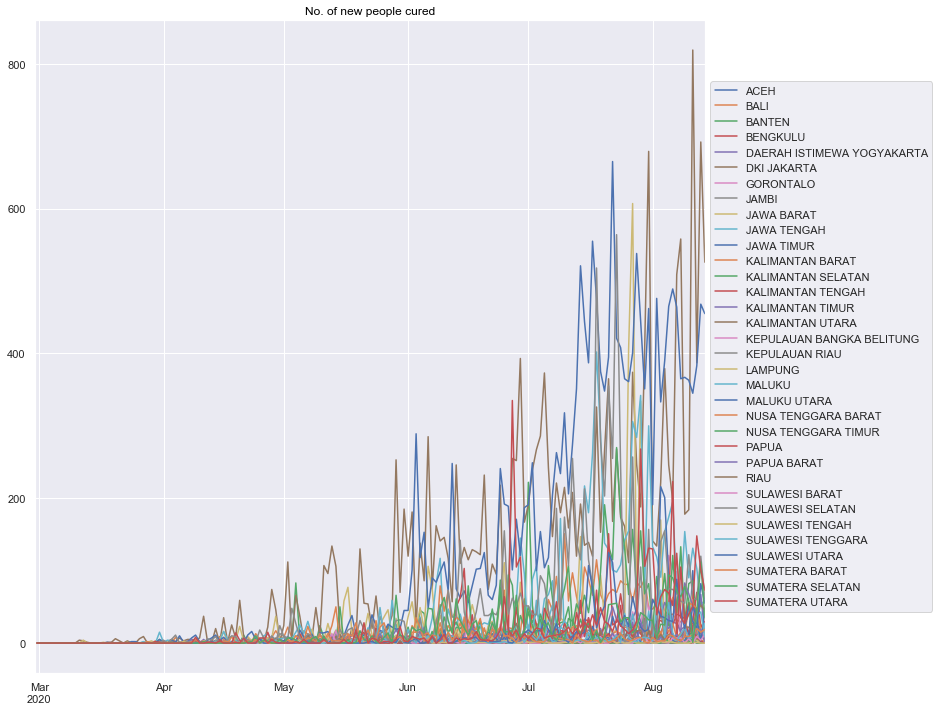

In [5]:
attribute_df = pd.read_json(every_attribute_stats['No. of new people cured'])
fig1 = plt.figure()
plt.title('No. of new people cured', color='black')
attribute_df.plot(ax = fig1.gca(), figsize = (12, 12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

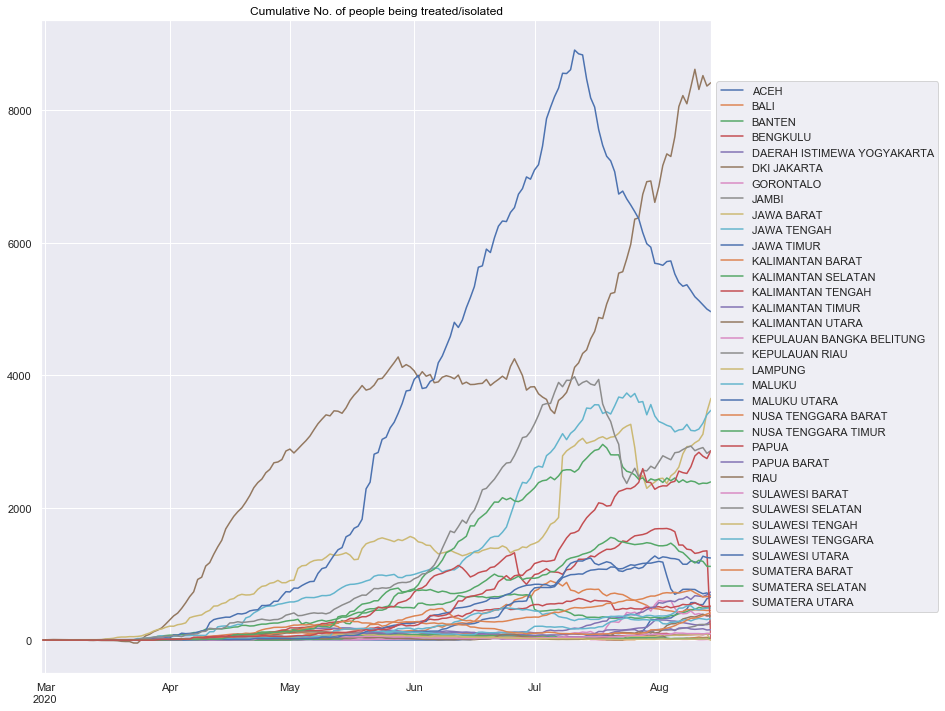

In [6]:
attribute_df = pd.read_json(every_attribute_stats['Cumulative No. of people being treated/isolated'])
fig2 = plt.figure()
plt.title('Cumulative No. of people being treated/isolated', color='black')
attribute_df.plot(ax = fig2.gca(), figsize = (12, 12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()